# ASSIGNMENT 5: Monte-Carlo Simulation to Simulate Pricing Options

# Covered Process: Monte-Carlo Simulation

In [4]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.optimize import minimize
import pytz
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.tsa.api as smt
from copy import deepcopy
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic
import warnings
warnings.filterwarnings("ignore")
import statsmodels.tools.eval_measures
import scipy 
from scipy import stats 
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VARMAX
from statsmodels.tsa.api import VECM
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron
from statsmodels.tsa.vector_ar import vecm
from statsmodels.regression.rolling import RollingOLS
from statsmodels.distributions.copula.api import StudentTCopula
import arch
import math
from pandas_datareader import data as pdr

In [38]:
import numpy as np

S0 = 377.44 
K = 377.5  # exercise price
T = 1  # maturity in years
r = 0.0441  # risk-free rate
d = 0.0  # dividend yield
sigma = 0.436  # implied volatility
n_simulation = 10000
n_steps = 252
dt = T / n_steps
call = np.zeros([n_simulation], dtype=float)
put = np.zeros([n_simulation], dtype=float)

for j in range(0, n_simulation):
    ST = S0
    total = 0

    for i in range(0, int(n_steps)):
        e = np.random.normal()
        ST = ST * np.exp((r - d - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * e)
        total += ST

    price_average = total / n_steps
    call[j] = max(price_average - K, 0) * np.exp(-r * T)
    put[j] = max(K - price_average, 0) * np.exp(-r * T)

call_price = np.average(call)
put_price = np.average(put)

print('call price', round(call_price, 2))
print('put price=', round(put_price, 2))


call price 40.74
put price= 32.68


In [39]:
import numpy as np

S0 = 377.44
K = 377.5  # exercise price
T = 1  # maturity in years
r = 0.0441  # risk-free rate
d = 0.0  # dividend yield
sigma = 0.026  # implied volatility
n_simulation = 10000
n_steps = 252
dt = T / n_steps
call = np.zeros([n_simulation], dtype=float)
put = np.zeros([n_simulation], dtype=float)

for j in range(0, n_simulation):
    ST = S0
    total = 0

    for i in range(0, int(n_steps)):
        e = np.random.normal()
        ST = ST * np.exp((r - d - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * e)
        total += ST

    price_average = total / n_steps
    call[j] = max(price_average - K, 0) * np.exp(-r * T)
    put[j] = max(K - price_average, 0) * np.exp(-r * T)

call_price = np.average(call)
put_price = np.average(put)

print('call price', round(call_price, 2))
print('put price=', round(put_price, 2))


call price 8.15
put price= 0.19


[*********************100%%**********************]  1 of 1 completed


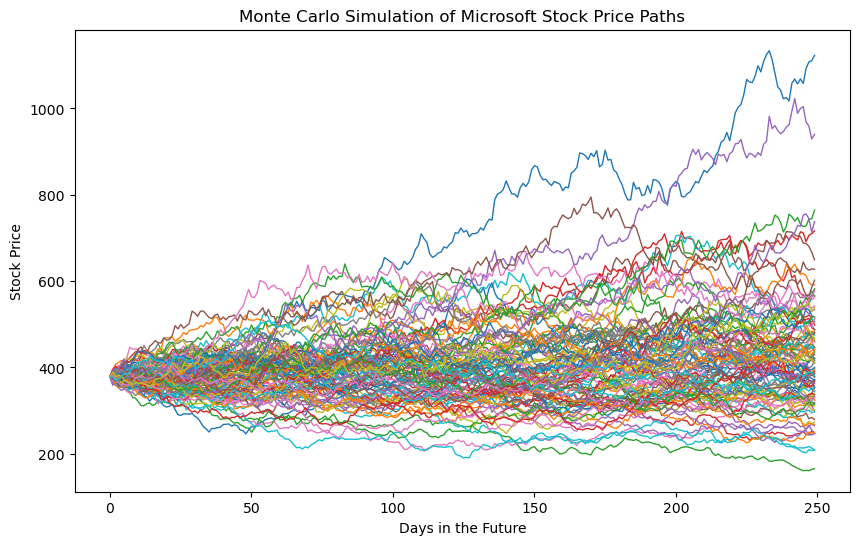

In [46]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Function to fetch historical stock data
def get_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data['Close']

# Function for Monte Carlo simulation
def monte_carlo_simulation(stock_data, days, simulations):
    returns = stock_data.pct_change().dropna()
    log_returns = np.log(1 + returns)

    mean_return = log_returns.mean()
    var = log_returns.var()

    daily_returns = np.exp(mean_return + np.sqrt(var) * np.random.normal(0, 1, size=(days, simulations)))
    price_paths = np.zeros_like(daily_returns)
    price_paths[0] = stock_data.iloc[-1]

    for t in range(1, days):
        price_paths[t] = price_paths[t - 1] * daily_returns[t]

    return price_paths

# Set the stock symbol and date range
stock_symbol = 'MSFT'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime.now()

# Fetch historical stock data
stock_data = get_stock_data(stock_symbol, start_date, end_date)

# Set simulation parameters
days_future = 250
num_simulations = 100

# Run Monte Carlo simulation
simulated_paths = monte_carlo_simulation(stock_data, days_future, num_simulations)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(simulated_paths, lw=1)
plt.title('Monte Carlo Simulation of Microsoft Stock Price Paths')
plt.xlabel('Days in the Future')
plt.ylabel('Stock Price')
plt.show()
